In [1]:
# Import our dependencies
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# read in cvs as dataframe
df = pd.read_csv("../Data/socialmedia_mentalhealth.csv")
df.head()

,country,suicide_year,sex,age_range,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,m,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,m,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,f,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,m,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,m,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   suicide_year       27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age_range          27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_100k_pop  27820 non-null  float64
 7   country_year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9    gdp_for_year      27820 non-null  int64  
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [4]:
suicides_100k_pop_count = df.suicides_no.value_counts()
suicides_100k_pop_count

0       4281
1       1539
2       1102
3        867
4        696
        ... 
2158       1
525        1
2297       1
5241       1
2872       1
Name: suicides_no, Length: 2084, dtype: int64

In [5]:
age_range_count = df.age_range.value_counts()
age_range_count

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_range, dtype: int64

In [6]:
generation_count = df.generation.value_counts()
generation_count

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

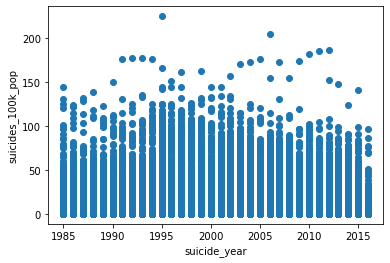

In [7]:
# scatter plot of suicide_year vs suicides_100k_pop
plt.scatter(df.suicide_year, df.suicides_100k_pop)
plt.xlabel('suicide_year')
plt.ylabel('suicides_100k_pop')
plt.show()

In [8]:
# count of rows that is United States 
country_count = df[df['country'] == 'United States'].count()
country_count

country              372
suicide_year         372
sex                  372
age_range            372
suicides_no          372
population           372
suicides_100k_pop    372
country_year         372
HDI_for_year         120
 gdp_for_year        372
gdp_per_capita       372
generation           372
dtype: int64

In [9]:
# filter dataframe to United States and suicide_year greater than or equal to 2005 
first_filter = df['country'] == 'United States'
second_filter = df.suicide_year >= 2005
data = df[first_filter & second_filter]
data.head()

,country,suicide_year,sex,age_range,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27088,United States,2005,m,75+ years,2610,6883241,37.92,United States2005,0.897,13093726000000,47423,Silent
27089,United States,2005,m,35-54 years,10332,42835394,24.12,United States2005,0.897,13093726000000,47423,Boomers
27090,United States,2005,m,55-74 years,5190,23156114,22.41,United States2005,0.897,13093726000000,47423,Silent
27091,United States,2005,m,25-34 years,4066,20421260,19.91,United States2005,0.897,13093726000000,47423,Generation X
27092,United States,2005,m,15-24 years,3498,21647159,16.16,United States2005,0.897,13093726000000,47423,Millenials


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 27088 to 27219
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            132 non-null    object 
 1   suicide_year       132 non-null    int64  
 2   sex                132 non-null    object 
 3   age_range          132 non-null    object 
 4   suicides_no        132 non-null    int64  
 5   population         132 non-null    int64  
 6   suicides_100k_pop  132 non-null    float64
 7   country_year       132 non-null    object 
 8   HDI_for_year       72 non-null     float64
 9    gdp_for_year      132 non-null    int64  
 10  gdp_per_capita     132 non-null    int64  
 11  generation         132 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 13.4+ KB


In [11]:
# create feature X and target y
X = np.array(data.loc[:,'suicide_year']).reshape(-1,1)
y = np.array(data.loc[:,'suicides_100k_pop']).reshape(-1,1)

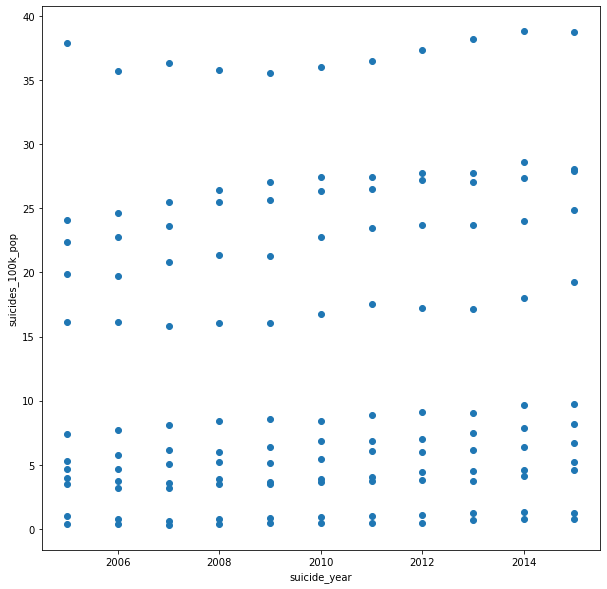

In [12]:
# Scatter plot
plt.figure(figsize=[10,10])
plt.scatter(x=X,y=y)
plt.xlabel('suicide_year')
plt.ylabel('suicides_100k_pop')
plt.show()

In [13]:
# Drop the non-beneficial columns
data.drop(columns=['country', 'suicides_no', 'country_year', 'HDI_for_year'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,suicide_year,sex,age_range,population,suicides_100k_pop,gdp_for_year,gdp_per_capita,generation
0,2005,m,75+ years,6883241,37.92,13093726000000,47423,Silent
1,2005,m,35-54 years,42835394,24.12,13093726000000,47423,Boomers
2,2005,m,55-74 years,23156114,22.41,13093726000000,47423,Silent
3,2005,m,25-34 years,20421260,19.91,13093726000000,47423,Generation X
4,2005,m,15-24 years,21647159,16.16,13093726000000,47423,Millenials


In [14]:
# Determine the number of unique values in each column.
data.nunique()

suicide_year          11
sex                    2
age_range              6
population           132
suicides_100k_pop    124
 gdp_for_year         11
gdp_per_capita        11
generation             5
dtype: int64

In [15]:
# Generate our categorical variable lists
data_cat = data.dtypes[data.dtypes == "object"].index.tolist()
data_cat

['sex', 'age_range', 'generation']

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(data[data_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(data_cat)
encode_df.head()

,sex_f,sex_m,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_5-14 years,age_range_55-74 years,age_range_75+ years,generation_Boomers,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
data = data.merge(encode_df,left_index=True, right_index=True)
data = data.drop(data_cat,1)

In [18]:
data.tail()

,suicide_year,population,suicides_100k_pop,gdp_for_year,gdp_per_capita,sex_f,sex_m,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_5-14 years,age_range_55-74 years,age_range_75+ years,generation_Boomers,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
127,2015,21555712,6.70,18120714000000,60387,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
128,2015,21633813,5.23,18120714000000,60387,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
129,2015,11778666,4.58,18120714000000,60387,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
130,2015,21273987,1.20,18120714000000,60387,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
131,2015,20342901,0.78,18120714000000,60387,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
data.shape

(132, 18)

In [20]:
# create training dataframe
third_filter = data.suicide_year <=2012
data_train = data[third_filter]
data_train.head()

,suicide_year,population,suicides_100k_pop,gdp_for_year,gdp_per_capita,sex_f,sex_m,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_5-14 years,age_range_55-74 years,age_range_75+ years,generation_Boomers,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,2005,6883241,37.92,13093726000000,47423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2005,42835394,24.12,13093726000000,47423,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2005,23156114,22.41,13093726000000,47423,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2005,20421260,19.91,13093726000000,47423,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2005,21647159,16.16,13093726000000,47423,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# create testing dataframe
fourth_filter = data.suicide_year >2012
data_test = data[fourth_filter]
data_test.tail()

,suicide_year,population,suicides_100k_pop,gdp_for_year,gdp_per_capita,sex_f,sex_m,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_5-14 years,age_range_55-74 years,age_range_75+ years,generation_Boomers,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
127,2015,21555712,6.70,18120714000000,60387,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
128,2015,21633813,5.23,18120714000000,60387,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
129,2015,11778666,4.58,18120714000000,60387,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
130,2015,21273987,1.20,18120714000000,60387,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
131,2015,20342901,0.78,18120714000000,60387,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y_train = data_train["suicides_100k_pop"].values
X_train = data_train.drop(["suicides_100k_pop"],1).values

In [23]:
# Split our preprocessed data into our features and target arrays
y_test = data_test["suicides_100k_pop"].values
X_test = data_test.drop(["suicides_100k_pop"],1).values

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Multivariate Regression on all 7 features for `X` and suicides_100k_pop value for `y`.

### Linear Regression Model

In [25]:
# Create the model by using LinearRegression
model = LinearRegression()

In [26]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Use our model to make predictions
y_predict = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# A good MSE score will be close to zero, while a good R2 score will be close to 1.
print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 24.546860120168944
R-squared (R2): 0.8315115210339677


In [27]:
# calculate the scores for the training and testing data
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9119736139182569
Testing Score: 0.8315115210339677


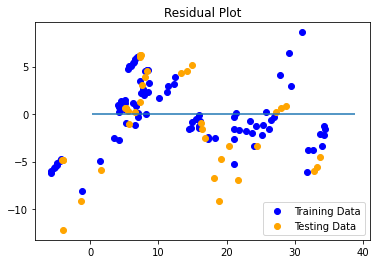

In [28]:
# Plot the residuals for the training and testing data.
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

### Random Forest Regressor Model

In [29]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data

In [30]:
# Fit the model to the training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# A good MSE score will be close to zero, while a good R2 score will be close to 1.
print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 0.8826468234472792
R-squared (R2): 0.9939415542346844


In [31]:
# calculate the scores for the training and testing data
training_score = rf.score(X_train, y_train)
testing_score = rf.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9993858437066812
Testing Score: 0.9939415542346844


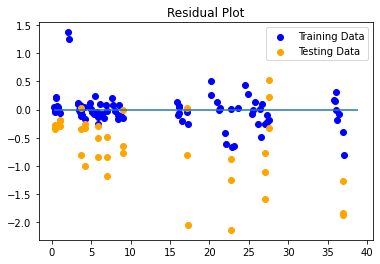

In [32]:
# Plot the residuals for the training and testing data.
plt.scatter(rf.predict(X_train), rf.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(rf.predict(X_test), rf.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [33]:
X = data_train.drop("suicides_100k_pop", axis=1)
X.head()

,suicide_year,population,gdp_for_year,gdp_per_capita,sex_f,sex_m,age_range_15-24 years,age_range_25-34 years,age_range_35-54 years,age_range_5-14 years,age_range_55-74 years,age_range_75+ years,generation_Boomers,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,2005,6883241,13093726000000,47423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2005,42835394,13093726000000,47423,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2005,23156114,13093726000000,47423,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2005,20421260,13093726000000,47423,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2005,21647159,13093726000000,47423,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


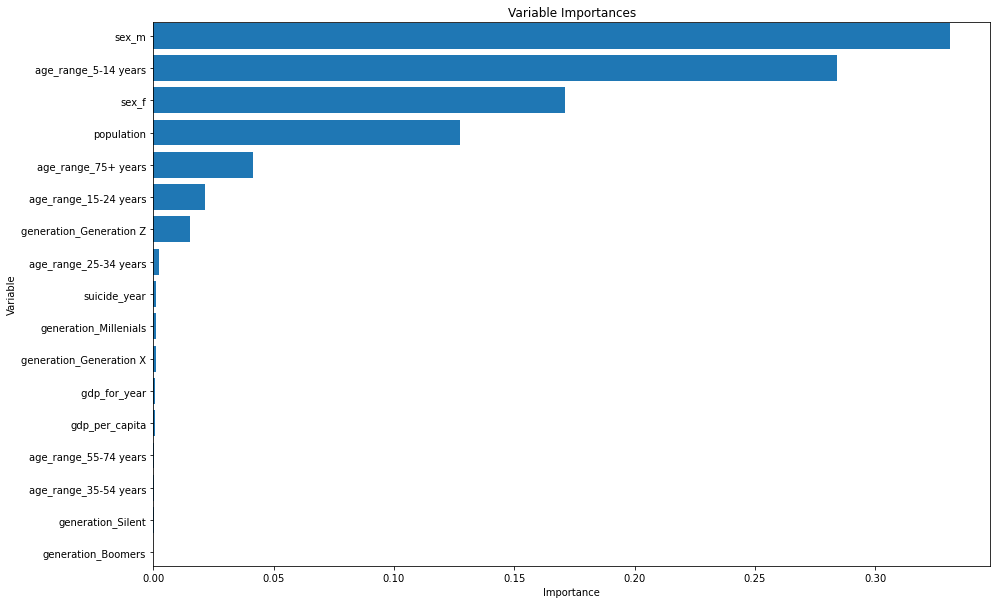

In [34]:
# sort feature importance from highest to lowest
feature_importances = rf.feature_importances_
features = sorted(zip(X.columns, rf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

# Axis labels and title
plt.ylabel('Variable') 
plt.xlabel('Importance') 
plt.title('Variable Importances')

plt.show()